In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv("health_train.csv")

In [3]:
df2 = df.copy()

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
age,21.000,36.977,18.000,37.000,58.000,46.000,25.222,29.486,26.520,47.493,...,41.836,25.000,20.000,49.815,32.877,31.058,36.834,56.000,49.000,33.000
sex,male,female,male,male,male,male,male,female,male,female,...,male,male,male,female,male,male,male,female,male,male
bmi,25.745,25.744,30.030,30.677,32.010,26.620,31.193,24.223,25.066,27.302,...,33.647,26.220,35.122,33.878,33.215,27.555,30.322,36.180,36.430,36.641
smoker,no,yes,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
region,northeast,southeast,southeast,northeast,southeast,southeast,northeast,northwest,southwest,northwest,...,northeast,northeast,southwest,northwest,southwest,southeast,northeast,northwest,northwest,southwest
children,2,3,1,3,1,1,4,2,5,3,...,4,0,5,4,5,4,3,2,3,5
charges,3279.869,21454.494,1720.354,6801.438,11946.626,7742.110,21736.328,4916.953,5515.809,17009.335,...,14799.031,2721.321,4853.658,11247.445,6628.269,5889.104,6788.534,12401.747,10376.295,6658.237


In [5]:
df.describe()

,age,bmi,children,charges
count,2500.000,2500.000,2500.000,2500.000
mean,39.003,30.575,2.488,12679.312
std,12.265,5.390,1.707,10593.270
min,18.000,15.960,0.000,1121.874
25%,28.846,26.718,1.000,5612.781
50%,39.350,30.200,2.000,9455.047
75%,48.689,34.046,4.000,14440.628
max,64.000,53.130,5.000,63770.428


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [27]:
X = df.drop(["charges"], axis=1)
y = df["charges"]

In [9]:
X["bmi_class"] = X.bmi

In [10]:
for i in range(len(X.bmi)):
    if X["bmi"][i] > 0 and X["bmi"][i] <= 16:
        X["bmi_class"][i] = "Underweight 3"
    elif X["bmi"][i] > 16 and X["bmi"][i] <= 16.9:
        X["bmi_class"][i] = "Underweight 2"
    elif X["bmi"][i] > 16.9 and X["bmi"][i] <= 18.4:
        X["bmi_class"][i] = "Underweight 1"
    elif X["bmi"][i] > 18.4 and X["bmi"][i] <= 24.9:
        X["bmi_class"][i] = "Normal"
    elif X["bmi"][i] > 24.9 and X["bmi"][i] <= 29.9:
        X["bmi_class"][i] = "Pre-obese"
    elif X["bmi"][i] > 29.9 and X["bmi"][i] <= 34.9:
        X["bmi_class"][i] = "Obese 1"
    elif X["bmi"][i] > 34.9 and X["bmi"][i] <= 40:
        X["bmi_class"][i] = "Obese 2"
    elif X["bmi"][i] >= 40:
        X["bmi_class"][i] = "Obese 3"

In [11]:
X["age_class"] = X.age

In [12]:
for i in range(len(X.age)):
    if X["age"][i] >= 18 and X["age"][i] <= 24:
        X["age_class"][i] = "Younger"
    elif X["age"][i] > 24 and X["age"][i] <= 35:
        X["age_class"][i] = "Young"
    elif X["age"][i] > 35 and X["age"][i] <= 49:
        X["age_class"][i] = "Mid Age"
    elif X["age"][i] > 49:
        X["age_class"][i] = "Old"

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
cat = X.select_dtypes("object").columns
cat

Index(['sex', 'smoker', 'region', 'bmi_class', 'age_class'], dtype='object')

In [15]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,age,sex,bmi,smoker,region,children,bmi_class,age_class
0,21.000,1.000,25.745,0.000,0.000,2,4.000,3.000
1,36.977,0.000,25.744,1.000,2.000,3,4.000,0.000
2,18.000,1.000,30.030,0.000,2.000,1,1.000,3.000
3,37.000,1.000,30.677,0.000,0.000,3,1.000,0.000
4,58.000,1.000,32.010,0.000,2.000,1,1.000,1.000


In [16]:
X.head()

,age,sex,bmi,smoker,region,children,bmi_class,age_class
0,21.000,1.000,25.745,0.000,0.000,2,4.000,3.000
1,36.977,0.000,25.744,1.000,2.000,3,4.000,0.000
2,18.000,1.000,30.030,0.000,2.000,1,1.000,3.000
3,37.000,1.000,30.677,0.000,0.000,3,1.000,0.000
4,58.000,1.000,32.010,0.000,2.000,1,1.000,1.000


<AxesSubplot:xlabel='age', ylabel='charges'>

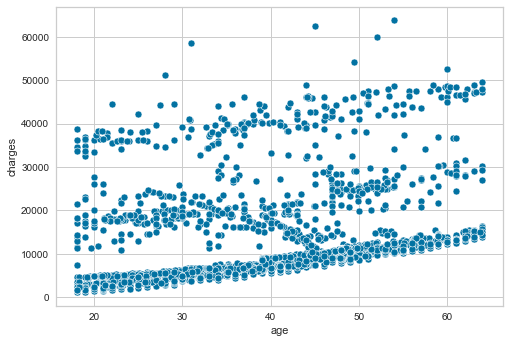

In [29]:
sns.scatterplot(X.age, y)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

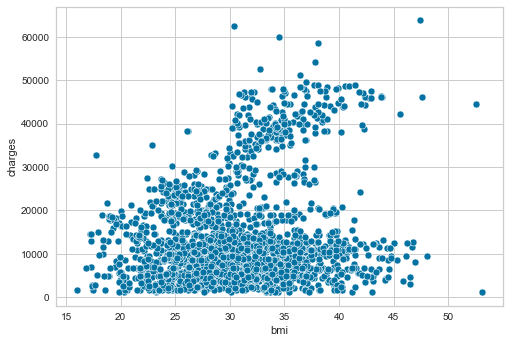

In [30]:
sns.scatterplot(X.bmi, y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (2000, 8)
Train target shape   :  (2000,)
Test features shape  :  (500, 8)
Test target shape    :  (500,)


In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

XGBoost

In [20]:
from xgboost import XGBRegressor

In [21]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [22]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [23]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=101, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
 

In [24]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 100,
 'subsample': 0.5}

In [25]:
grid_model.best_score_

-3921.388093789466

In [26]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.946,0.919
mae,1203.097,1646.038
mse,5973257.545,9605904.781
rmse,2444.025,3099.339


In [78]:
grid_model.fit(X, y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=101, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
 

In [31]:
model = XGBRegressor(random_state=101, objective="reg:squarederror",learning_rate=0.2, max_dept=6, subsample=0.5)
model.fit(X_train, y_train)

[00:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_dept=6, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
model.feature_importances_

array([0.0229118 , 0.01138755, 0.03000221, 0.8449897 , 0.02747178,
       0.02823206, 0.01468639, 0.02031848], dtype=float32)

In [33]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

ValueError: Shape of passed values is (8, 1), indices imply (6, 1)

In [79]:
df_test = pd.read_csv("health_test.csv")

In [80]:
cat = df_test.select_dtypes("object").columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [82]:
enc = OrdinalEncoder()
df_test[cat] = enc.fit_transform(df_test[cat])
df_test.head()

,age,sex,bmi,smoker,region,children
0,39.297,1.000,29.978,0.000,1.000,4
1,40.368,0.000,27.928,0.000,2.000,5
2,32.882,1.000,41.577,0.000,3.000,5
3,62.000,0.000,30.495,0.000,1.000,2
4,32.476,1.000,30.323,1.000,0.000,4


In [83]:
y_final_pred = grid_model.predict(df_test)

In [85]:
y_final_pred

array([ 7999.1255,  9161.717 ,  6381.747 , 17028.67  , 35251.047 ,
        6591.1953, 10446.273 ,  9168.338 ,  9414.553 ,  1881.145 ,
       11431.659 ,  3657.4658, 12462.294 ,  8313.361 , 11605.837 ,
        6631.832 ,  6982.65  ,  5153.674 ,  3091.094 , 39813.094 ,
        4050.995 , 10594.319 , 30384.852 , 31389.64  ,  8325.637 ,
        5539.5664, 16298.774 ,  3714.8943,  4242.978 , 24954.283 ,
        5112.9805,  6789.5234,  5236.5513, 10049.82  , 38465.55  ,
        6146.579 , 17383.42  , 10960.393 , 10167.608 , 47269.387 ,
       16518.129 , 11935.153 , 18649.266 , 37956.49  ,  5743.895 ,
        7237.504 ,  6590.0337, 10930.476 , 13906.431 , 17372.43  ,
       12471.271 ,  4603.9946, 13250.1875, 11133.609 , 11571.053 ,
       36322.816 , 11184.642 , 11538.955 ,  9170.46  , 12011.966 ,
        5069.666 , 43575.28  , 40751.695 , 33766.266 , 10253.221 ,
       11087.233 ,  6714.8657,  6526.695 ,  7015.6606, 38814.35  ,
       13501.482 ,  8128.248 ,  6625.6016, 12172.993 , 10725.6

In [86]:
y_final_pred = pd.DataFrame(y_final_pred, columns = ["y_final_pred"])

In [87]:
y_final_pred.describe()

,y_final_pred
count,451.000
mean,13468.927
std,10974.064
min,1387.533
25%,6367.759
50%,10168.852
75%,14344.312
max,47310.195


In [89]:
y_final_pred.to_csv("C9191.csv", index=False)